**Random Forrest for Project*

In [1]:
# Load all dependencies and the data
import numpy as np
from matplotlib.pylab import rcParams

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

import sklearn

In [2]:
# Add a new column with the country names.
# This is what we are going to try to predict.
# data['country'] = pd.Categorical.from_codes(country, country_names)
    #error


In [3]:
df = pd.read_csv('additional_co2_new.csv')
df = df.dropna(how='any',axis=1)
df.columns

Index(['Unnamed: 0', 'country', 'year', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita',
       'PM2.5 air pollution - mean annual exposure (micrograms per cubic meter)',
       'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'category'],
      dtype='object')

In [4]:
def round_5(x, base=5):
    return base * round(x/base)
# df['Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'] = round_5(df['Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'], base=5)

df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'] = round_5(df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'], base=5)

In [5]:
df.head()

,Unnamed: 0,country,year,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),category
0,0,Africa,1990,0.036,0.472,0.033,0.121,0.390,46.719096,169060,25.0,Africa
1,1,Africa,1991,0.038,0.475,0.032,0.122,0.401,46.530559,173284,25.0,Africa
2,2,Africa,1992,0.038,0.436,0.035,0.112,0.389,46.342022,177903,25.0,Africa
3,3,Africa,1993,0.036,0.469,0.032,0.120,0.386,46.153485,183152,25.0,Africa
4,4,Africa,1994,0.036,0.473,0.031,0.122,0.367,45.964949,188664,25.0,Africa


In [6]:
# Convert the country names to a digit (0, 1, 2) for each class.
df['country'] = pd.factorize(df['country'])[0]
df.head(90)

,Unnamed: 0,country,year,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),category
0,0,0,1990,0.036,0.472,0.033,0.121,0.390,46.719096,169060,25.0,Africa
1,1,0,1991,0.038,0.475,0.032,0.122,0.401,46.530559,173284,25.0,Africa
2,2,0,1992,0.038,0.436,0.035,0.112,0.389,46.342022,177903,25.0,Africa
3,3,0,1993,0.036,0.469,0.032,0.120,0.386,46.153485,183152,25.0,Africa
4,4,0,1994,0.036,0.473,0.031,0.122,0.367,45.964949,188664,25.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,3,1991,0.122,4.540,0.134,2.908,6.060,9.528191,109722,25.0,North America
86,86,3,1992,0.122,4.542,0.135,2.969,6.112,9.501610,109047,25.0,North America
87,87,3,1993,0.126,4.605,0.134,3.006,6.079,9.475030,111159,25.0,North America
88,88,3,1994,0.134,4.588,0.134,3.041,6.154,9.448450,111941,25.0,North America


Let's now split the entire dataset into a training and testing set.

In [7]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.75
df.head()

train_df = df[df['is_train']]
test_df  = df[~df['is_train']]

print('Length of train data:', len(train_df))
print('Length of test data :', len(test_df))

Length of train data: 72
Length of test data : 40


Let's now construct the features (input to Decision Tree) and the classes (target of the Decision Tree).

In [8]:
features = df.columns[3:-4]
features

Index(['cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'PM2.5 air pollution - mean annual exposure (micrograms per cubic meter)'],
      dtype='object')

In [9]:
#df['oil_co2'] = round(df['oil_co2'])
#print(df['oil_co2'])

In [10]:
targets  = df.columns[-3]
targets
#print(df['oil_co2'])

'rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'

We can construct a Decision Tree object and train it.

In [11]:
#df = pd.DataFrame(df)


In [12]:
#df.values.tolist() # as list

In [13]:
clf = DecisionTreeClassifier()


In [14]:
# from sklearn import preprocessing
# from sklearn import utils
#
# #convert y values to categorical values
# lab = preprocessing.LabelEncoder()




In [15]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# train_df = label_encoder.fit_transform(train_df)

In [16]:
clf.fit(train_df[features], train_df[targets])


DecisionTreeClassifier()

Now let's use the trained model to predict the class of test samples. Often it is useful to also display the probabilities with which the algorithm classifies a given sample.

In [17]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [18]:
clf.predict_proba(test_df[features])


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,

We can create a confusion matrix to show get a quick overview which classes are easy to predict and which ones are more difficult to distinguish.

In [19]:
predict_proba = clf.predict(test_df[features])
pd.crosstab(test_df['country'],
            predict_proba,
            rownames=['Actual Country'], 
            colnames=['Predicted Country'])

Predicted Country,20.0,25.0,30.0,40.0,50.0,55.0,65.0,70.0,75.0,80.0,85.0,90.0
Actual Country,,,,,,,,,,,,
0,0,4,10,0,0,0,0,0,0,0,0,0
1,0,0,0,3,3,2,4,0,0,0,0,0
2,0,0,0,0,0,0,1,1,2,1,2,1
3,2,4,0,0,0,0,0,0,0,0,0,0


Finally we can inspect which features are most important in the classification by reading out the feature importances.

In [20]:
fi = pd.DataFrame(clf.feature_importances_,
                  index=df.columns[3:-4],
                  columns=['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'])
fi_sorted = fi.sort_values('rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)', ascending=False)
fi_sorted

# AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

,rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)
oil_co2_per_capita,0.385788
flaring_co2_per_capita,0.189788
coal_co2_per_capita,0.169540
cement_co2_per_capita,0.091436
PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),0.090168
gas_co2_per_capita,0.073280


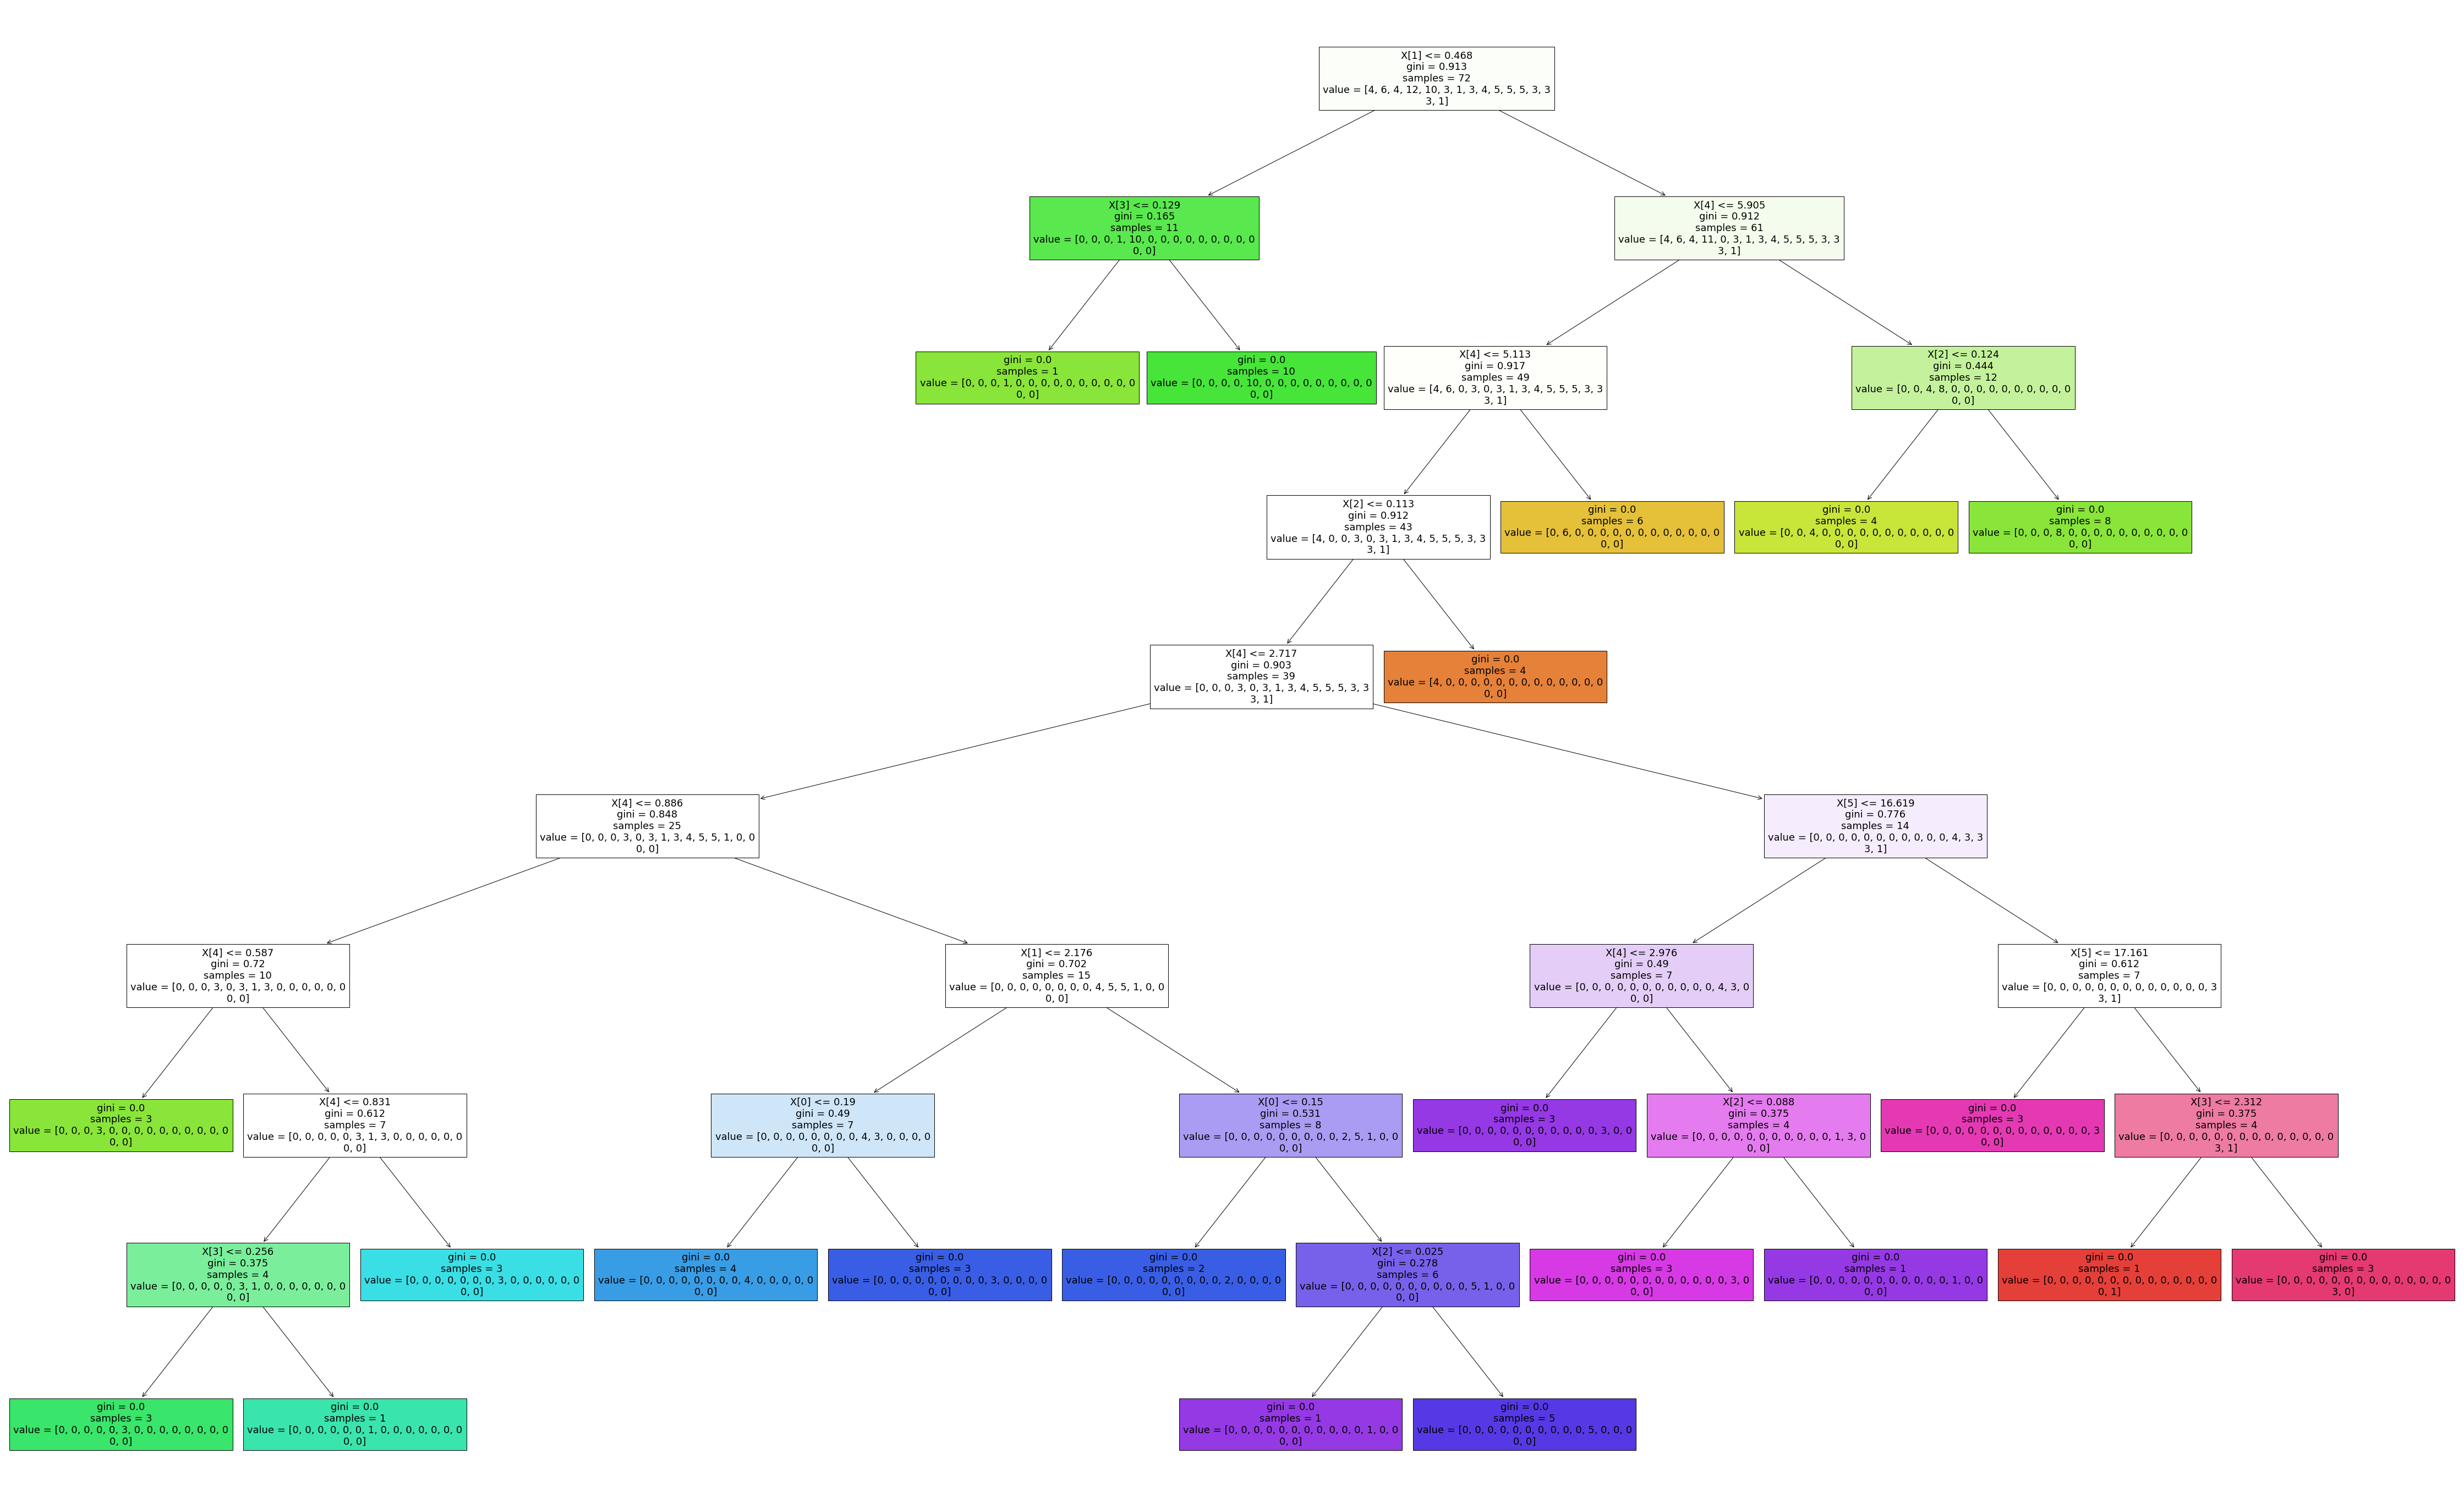

In [21]:
rcParams['figure.figsize'] = 80,50
tree_fig = plot_tree(clf, filled=True)
plt.savefig('rf.png',format='png',dpi=800)

In [22]:
########
########


In [23]:

sklearn.accuracy_score(predict_proba)

AttributeError: module 'sklearn' has no attribute 'accuracy_score'

In [ ]:
print("Accuracy:",sklearn.metrics.accuracy_score(test_df, predict_proba))